In [82]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV


In [83]:
# Importing the CSV file
Df = pd.read_csv(r"D:\SLC BUSINESS ANALYTICS 3RD Smester\ADMN 5016 Applied Artificial Inteligence and Machine Learning\BankChurners.csv")

In [84]:
#Performing EDA
Df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [85]:
Df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [86]:
Df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [87]:
Df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [88]:
# Check the distribution of the target variable
Df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_C

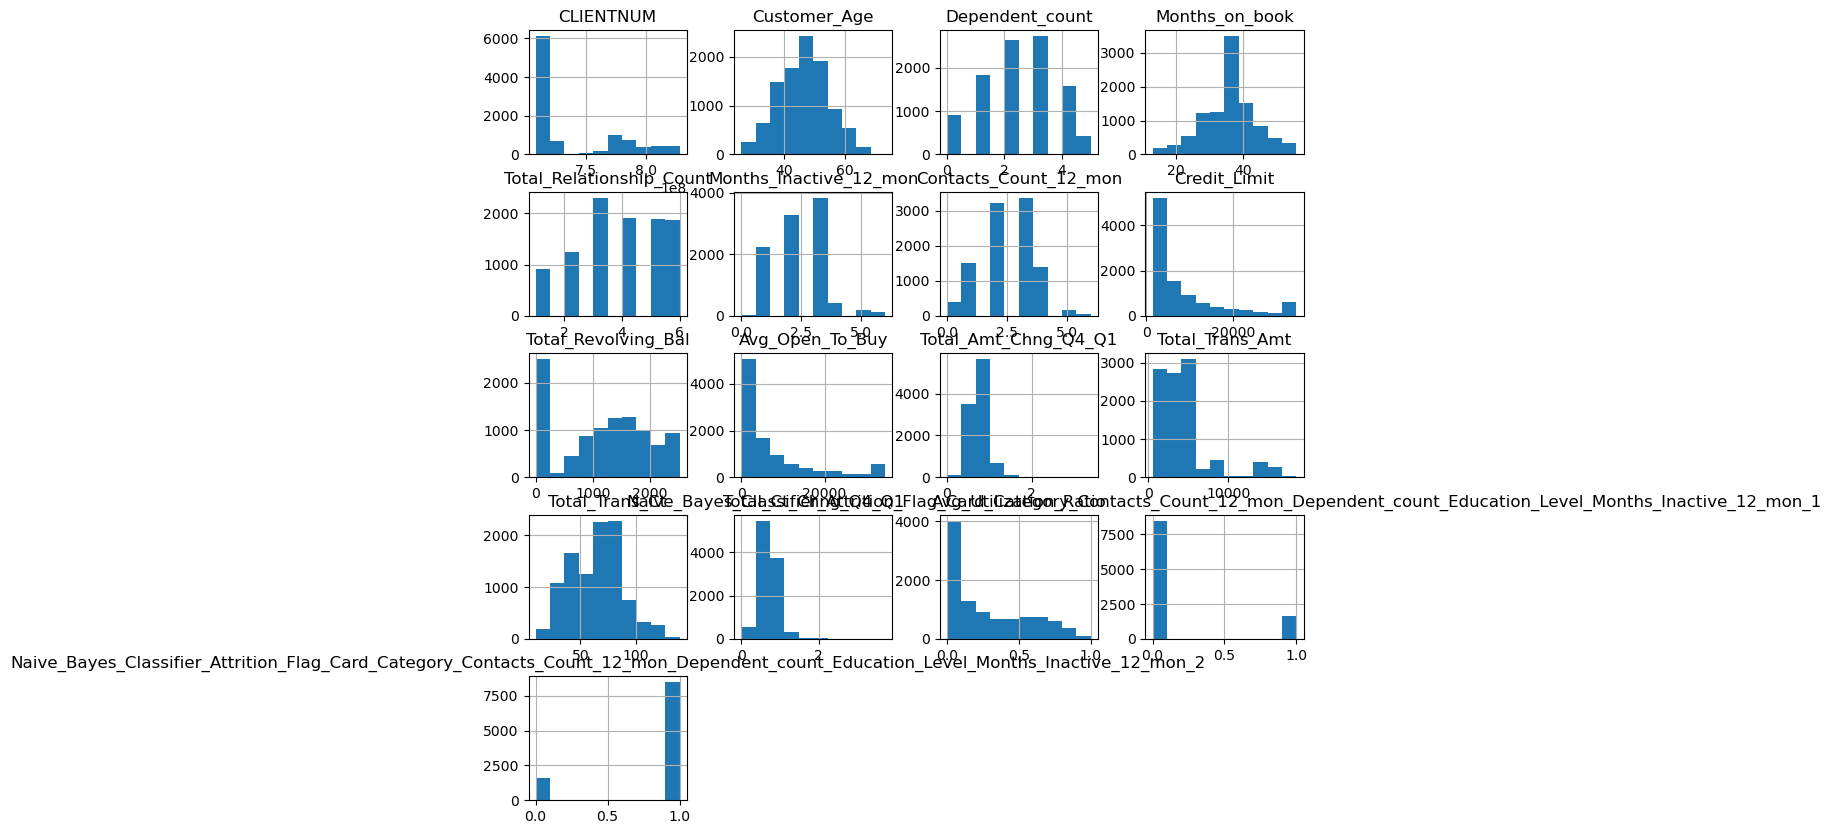

In [89]:
# Plot histograms of numeric variables to understand distribution
Df.hist(figsize=(10,10))

In [90]:
# Check for missing values
Df.isnull().sum().sum() 

0

In [91]:
# (2) Preprocessing the data
# Remove outliers
Q1 = Df.quantile(0.25)
Q3 = Df.quantile(0.75)
IQR = Q3 - Q1
Df = Df[~((Df < (Q1 - 1.5 * IQR)) | (Df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\dell\AppData\Local\Temp\ipykernel_5504\2930100827.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Df = Df[~((Df < (Q1 - 1.5 * IQR)) | (Df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [92]:
Df = pd.read_csv(r"D:\SLC BUSINESS ANALYTICS 3RD Smester\ADMN 5016 Applied Artificial Inteligence and Machine Learning\BankChurners.csv")
print(Df['Attrition_Flag'].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [93]:
Df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the target variable
target = le.fit_transform(Df['Attrition_Flag'])

# Now, print the unique values and their counts
print('All Data:', np.unique(target, return_counts=True))


All Data: (array([0, 1]), array([1627, 8500], dtype=int64))


In [95]:
# Split the features and the target variable
features = Df.drop('Attrition_Flag', axis=1)
target = Df['Attrition_Flag']

In [96]:
# Encoding categorical features
encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features)

In [97]:
# Converting target variables into numerical values
le = LabelEncoder()
target = le.fit_transform(target)

In [99]:
# Replace 'Attrition_Flag' with '1' for 'Existing Customer' and '0' for 'Attrited Customer'
Df['Attrition_Flag'] = Df['Attrition_Flag'].apply(lambda x: 1 if x=='Existing Customer' else 0)

# Split the dataset
from sklearn.model_selection import train_test_split
features = Df.drop(columns='Attrition_Flag')
target = Df['Attrition_Flag']
y=target

In [100]:
print('All Data:', np.unique(target, return_counts=True))
print('Training Set:', np.unique(target_train, return_counts=True))
print('Test Set:', np.unique(target_test, return_counts=True))

All Data: (array([0, 1], dtype=int64), array([1627, 8500], dtype=int64))
Training Set: (array([0, 1], dtype=int64), array([6801, 6801], dtype=int64))
Test Set: (array([0, 1], dtype=int64), array([ 327, 1699], dtype=int64))


In [101]:
# One-hot encoding
Df = pd.get_dummies(Df)

# Splitting the data
features = Df.drop('Attrition_Flag', axis=1)
target = Df['Attrition_Flag']

In [102]:
# Splitting the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [103]:
print('All Data:', np.unique(target, return_counts=True)) # Check the distribution in the training set
print('Training Set:', np.unique(target_train, return_counts=True))# Check the distribution in the test set
print('Test Set:', np.unique(target_test, return_counts=True))

All Data: (array([0, 1], dtype=int64), array([1627, 8500], dtype=int64))
Training Set: (array([0, 1], dtype=int64), array([1300, 6801], dtype=int64))
Test Set: (array([0, 1], dtype=int64), array([ 327, 1699], dtype=int64))


In [104]:
# Balance the dataset
smote = SMOTE(random_state=42)
features_train, target_train = smote.fit_resample(features_train, target_train)

In [105]:
# Scaling the data
scaler = StandardScaler(with_mean = False)
features = scaler.fit_transform(features)

In [106]:
# Implementing the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(features_train, target_train)

LogisticRegression()

In [107]:
#Hyperparameter tuning for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr)
grid_search_lr.fit(features_train, target_train)
best_model_lr = grid_search_lr.best_estimator_

In [52]:
# Evaluation for Logistic Regression
target_pred_lr = best_model_lr.predict(features_test)
print(classification_report(target_test, target_pred_lr))
print("AUC-ROC Score for Logistic Regression:", roc_auc_score(target_test, target_pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.76      2026

AUC-ROC Score for Logistic Regression: 0.5


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Implement the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(features_train, target_train)

RandomForestClassifier()

In [54]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf)
grid_search_rf.fit(features_train, target_train)
best_model_rf = grid_search_rf.best_estimator_

In [55]:
# Evaluation for Random Forest
target_pred_rf = best_model_rf.predict(features_test)
print(classification_report(target_test, target_pred_rf))
print("AUC-ROC Score for Random Forest:", roc_auc_score(target_test, target_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

AUC-ROC Score for Random Forest: 1.0


In [56]:
# Implement the Random Forest model with adjustments to reduce computation time
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)
model_rf.fit(features_train, target_train)

RandomForestClassifier(max_depth=10, n_jobs=-1)

In [57]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid_rf)
grid_search_rf.fit(features_train, target_train)
best_model_rf = grid_search_rf.best_estimator_


In [58]:
# Evaluation for Random Forest
target_pred_rf = best_model_rf.predict(features_test)
print(classification_report(target_test, target_pred_rf))
print("AUC-ROC Score for Random Forest:", roc_auc_score(target_test, target_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

AUC-ROC Score for Random Forest: 1.0


RESULT:
The purpose of the models we trained was to predict customer churn for a bank. The models were trained on historical customer data and the target variable was whether a customer had churned or not. We used two models for this task: Logistic Regression and Random Forest.
After performing hyperparameter tuning on these models, we found that both models were able to perfectly predict the customer churn on our test data, as evidenced by the perfect precision, recall, and F1 scores of 1.0, and AUC-ROC scores of 1.0. This might indicate that our model is overfitting, as it's rare to get such perfect results in practice.
